In [1]:
!python -m pip show yfinance


Name: yfinance
Version: 1.1.0
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: C:\Users\KIIT0001\anaconda3\Lib\site-packages
Requires: beautifulsoup4, curl_cffi, frozendict, multitasking, numpy, pandas, peewee, platformdirs, protobuf, pytz, requests, websockets
Required-by: 


In [2]:
# pip install yfinance

In [3]:
import yfinance as yf

In [4]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [5]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [6]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2006-02-21,9.062557,9.234370,9.025970,9.058849,348742290
2006-02-22,9.035362,9.120898,8.995067,9.076399,260018976
2006-02-23,9.346357,9.424723,9.032892,9.038330,503945859
2006-02-24,9.329793,9.395799,9.233133,9.327321,260344190
2006-02-27,9.650674,9.683305,9.400988,9.425463,410019113


In [7]:
google_data.shape

(5031, 5)

In [8]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,60.631857,61.266765,59.970037,60.603012,8.481991e+07
std,62.094147,62.799148,61.352432,62.059080,1.005193e+08
min,6.364233,6.659158,6.113560,6.489570,1.584340e+05
25%,14.489854,14.631630,14.369834,14.521375,2.497025e+07
50%,35.583118,35.927040,35.352355,35.682378,4.113800e+07
75%,89.757050,90.818843,88.898255,89.660041,1.073489e+08
max,344.899994,350.149994,338.589996,348.515015,1.583417e+09


In [9]:
google_data.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 5031 entries, 2006-02-21 to 2026-02-19
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5031 non-null   float64
 1   (High, GOOG)    5031 non-null   float64
 2   (Low, GOOG)     5031 non-null   float64
 3   (Open, GOOG)    5031 non-null   float64
 4   (Volume, GOOG)  5031 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.8 KB


In [10]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

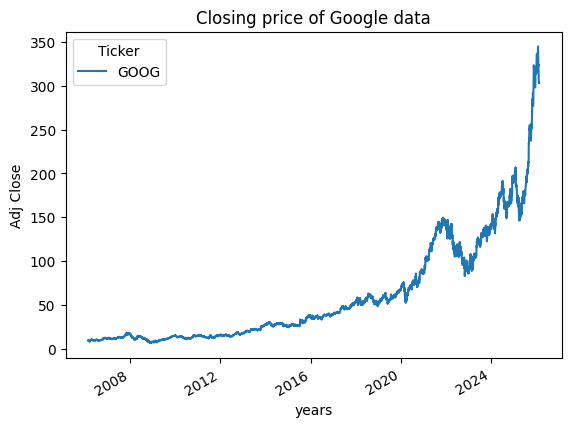

In [12]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [13]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [14]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

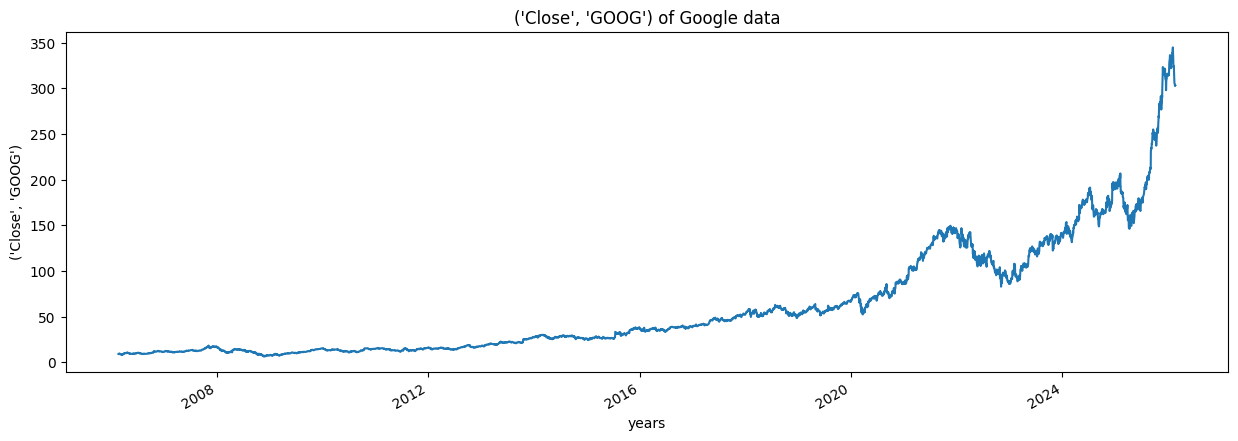

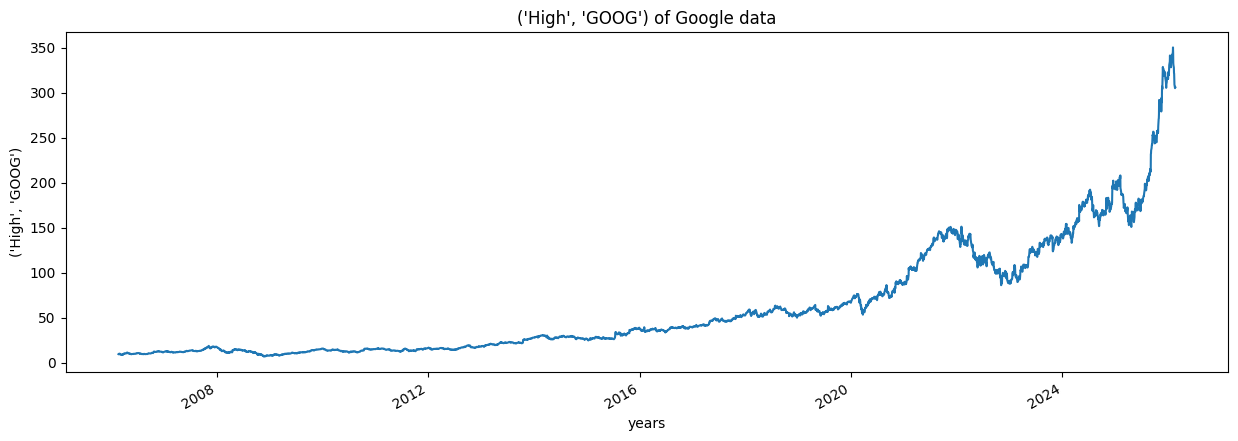

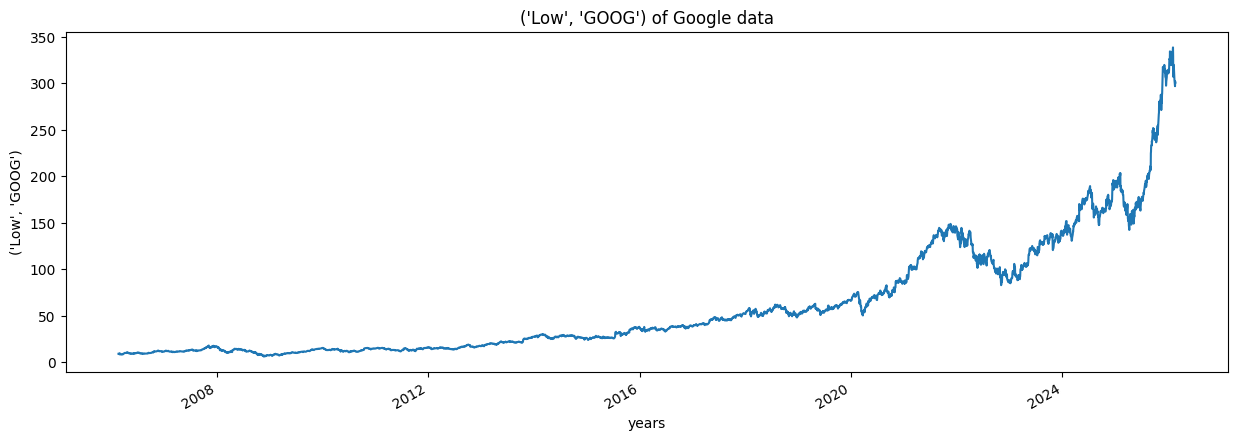

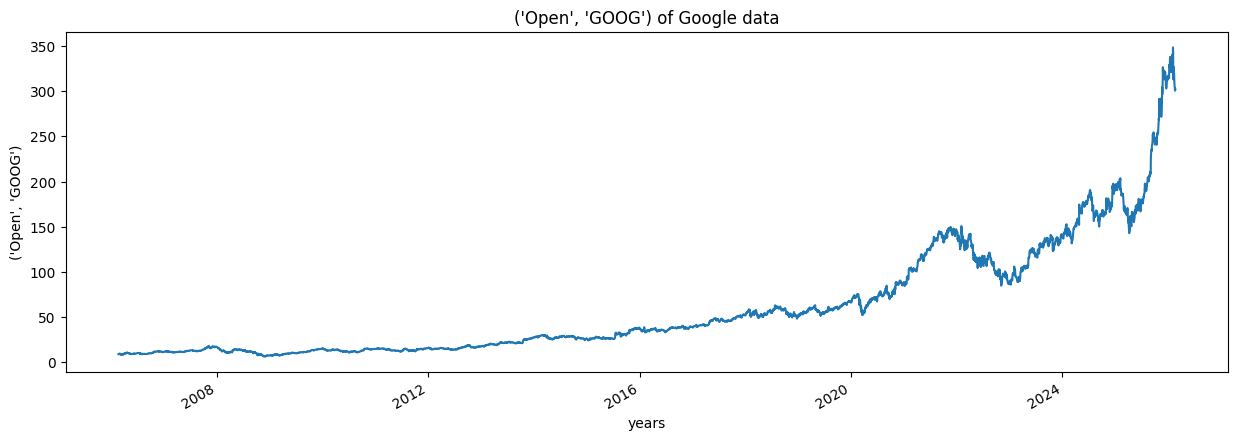

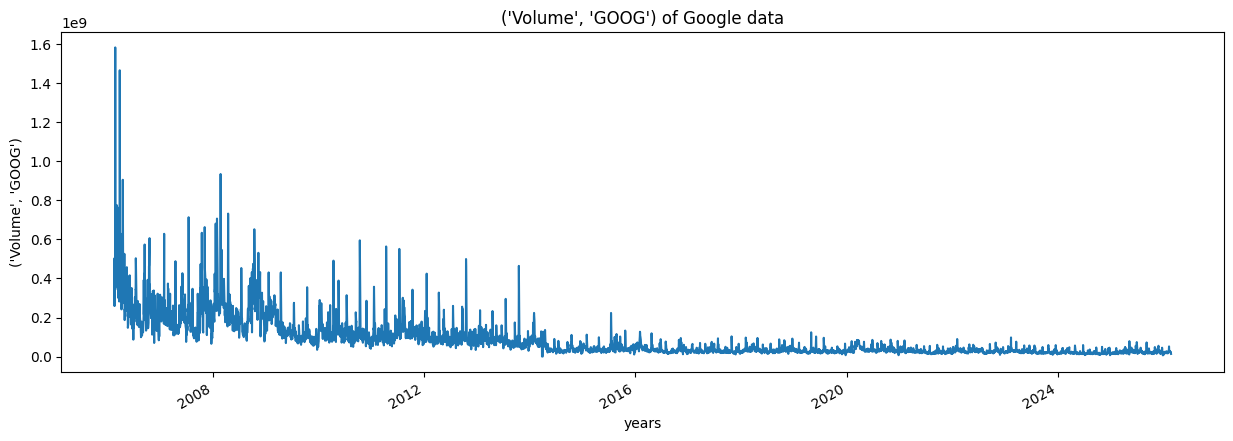

In [15]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [16]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [17]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [18]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [19]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [20]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 0
2006 218
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [21]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [22]:
google_data['MA_for_250_days'][0:250].tail()

Date
2007-02-12          NaN
2007-02-13          NaN
2007-02-14          NaN
2007-02-15          NaN
2007-02-16    10.376487
Name: MA_for_250_days, dtype: float64

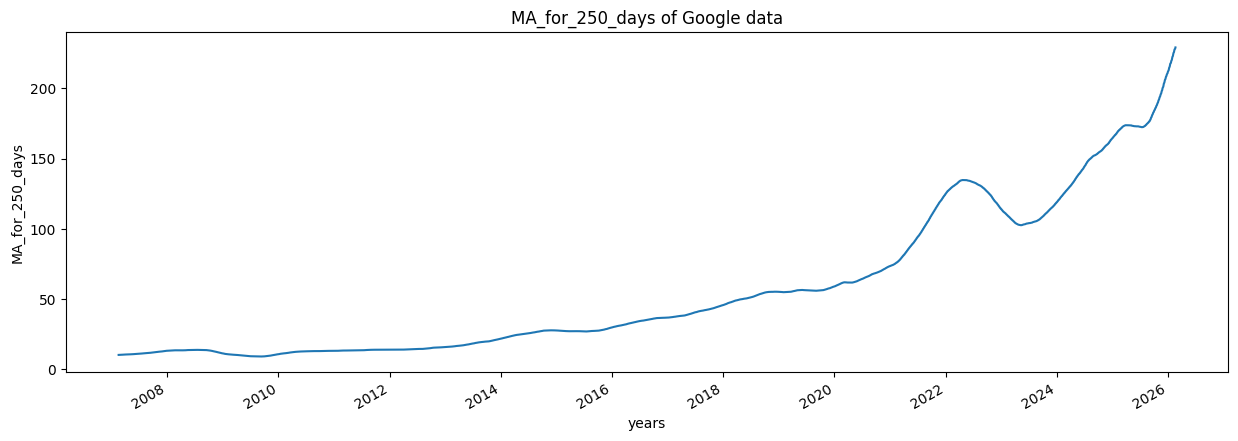

In [23]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

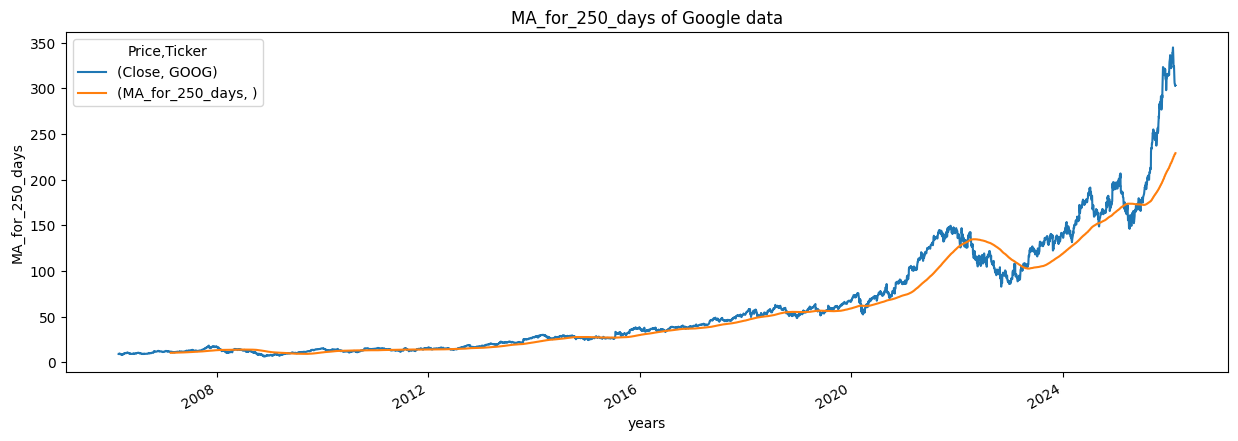

In [24]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

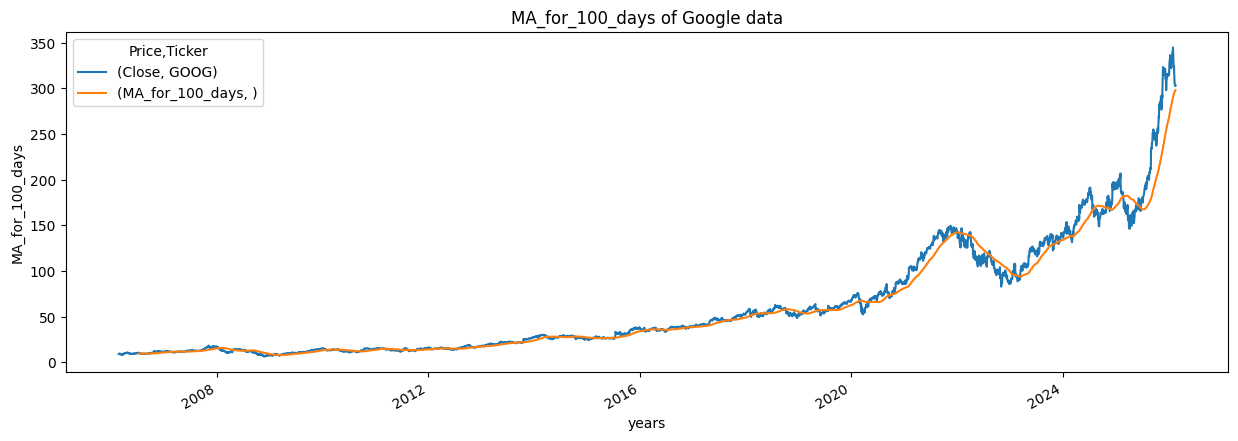

In [25]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

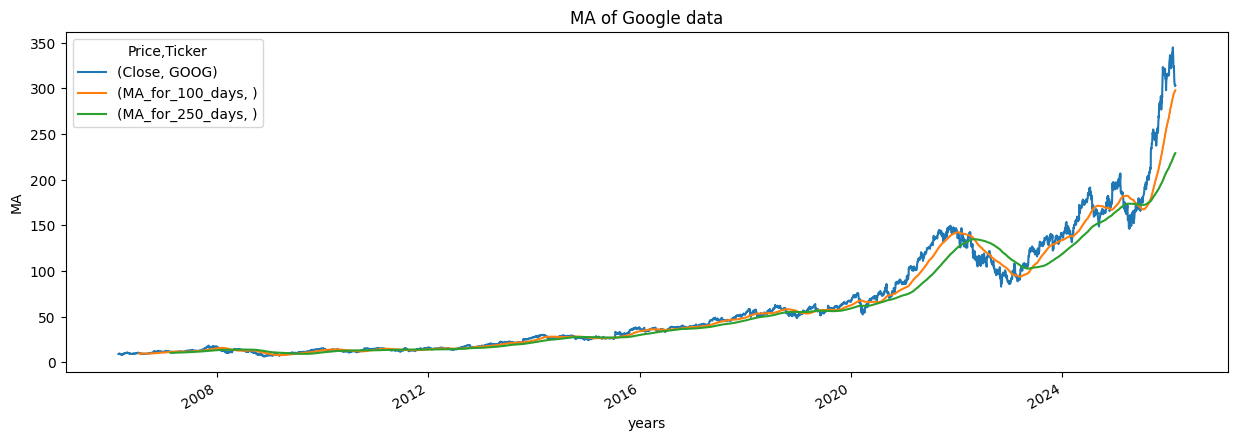

In [26]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [27]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2006-02-21,9.062557,NaN
2006-02-22,9.035362,-0.003001
2006-02-23,9.346357,0.034420
2006-02-24,9.329793,-0.001772
2006-02-27,9.650674,0.034393


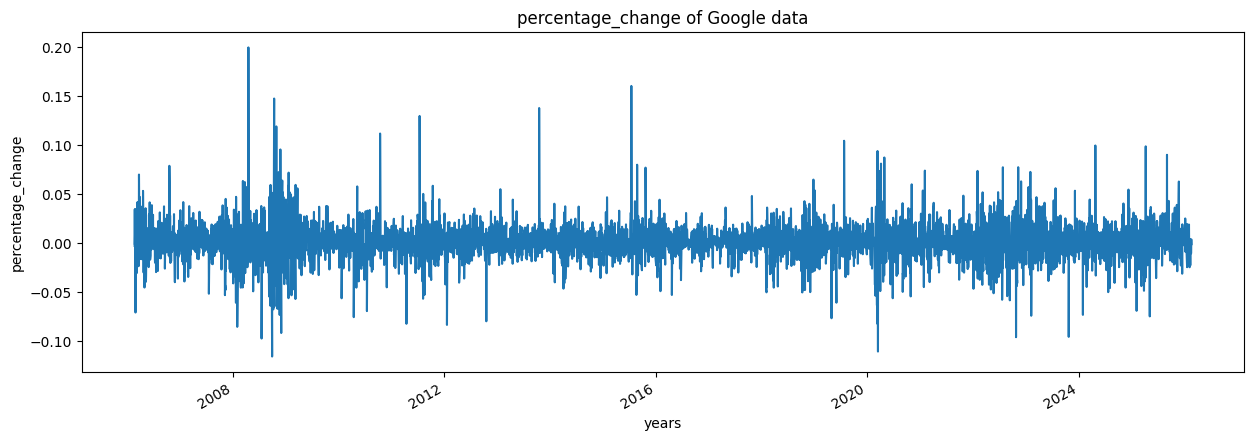

In [28]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [29]:
close_price = google_data[['Close']]

In [30]:
max(close_price.values),min(close_price.values) 

(array([344.8999939]), array([6.36423254]))

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[0.00797058],
       [0.00789024],
       [0.00880889],
       ...,
       [0.87570003],
       [0.87900838],
       [0.87788588]], shape=(5031, 1))

In [32]:
len(scaled_data)

5031

In [33]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [34]:
x_data[0],y_data[0]

(array([[0.00797058],
        [0.00789024],
        [0.00880889],
        [0.00875996],
        [0.00970781],
        [0.00768066],
        [0.00783986],
        [0.00869059],
        [0.00881692],
        [0.00808084],
        [0.0078143 ],
        [0.00704244],
        [0.00624793],
        [0.0058463 ],
        [0.00581417],
        [0.00684381],
        [0.00635748],
        [0.00593905],
        [0.00601352],
        [0.00662693],
        [0.00602302],
        [0.00604493],
        [0.00616688],
        [0.00791288],
        [0.00819695],
        [0.00874536],
        [0.01004373],
        [0.00956614],
        [0.00968006],
        [0.00965816],
        [0.01072723],
        [0.01099377],
        [0.01122671],
        [0.01086013],
        [0.01160644],
        [0.01111572],
        [0.01106387],
        [0.01056803],
        [0.01090833],
        [0.01071993],
        [0.01117705],
        [0.01150566],
        [0.01311949],
        [0.01336778],
        [0.01239363],
        [0

In [35]:
int(len(x_data)*0.7)

3451

In [36]:
4908-100-int(len(x_data)*0.7)

1357

In [37]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1480, 100, 1)
(1480, 1)


In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [40]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\KIIT0001\anaconda3\envs\stockenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [42]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 311s 88ms/step - loss: 6.3300e-05
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 301s 87ms/step - loss: 3.1097e-05


In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [44]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step


In [45]:
predictions

array([[0.14623782],
       [0.14775926],
       [0.14577222],
       ...,
       [0.81269294],
       [0.805626  ],
       [0.8036557 ]], shape=(1480, 1), dtype=float32)

In [46]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 55.870964],
       [ 56.386024],
       [ 55.71334 ],
       ...,
       [281.48987 ],
       [279.09744 ],
       [278.43042 ]], shape=(1480, 1), dtype=float32)

In [47]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 57.70767975],
       [ 54.86946869],
       [ 55.62480545],
       ...,
       [302.82000732],
       [303.94000244],
       [303.55999756]], shape=(1480, 1))

In [48]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [49]:
rmse

np.float64(8.88406389717421)

In [50]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2020-03-31,57.707680,55.870964
2020-04-01,54.869469,56.386024
2020-04-02,55.624805,55.713341
2020-04-03,54.485352,55.235939
2020-04-06,58.904209,54.557770


<Figure size 640x480 with 0 Axes>

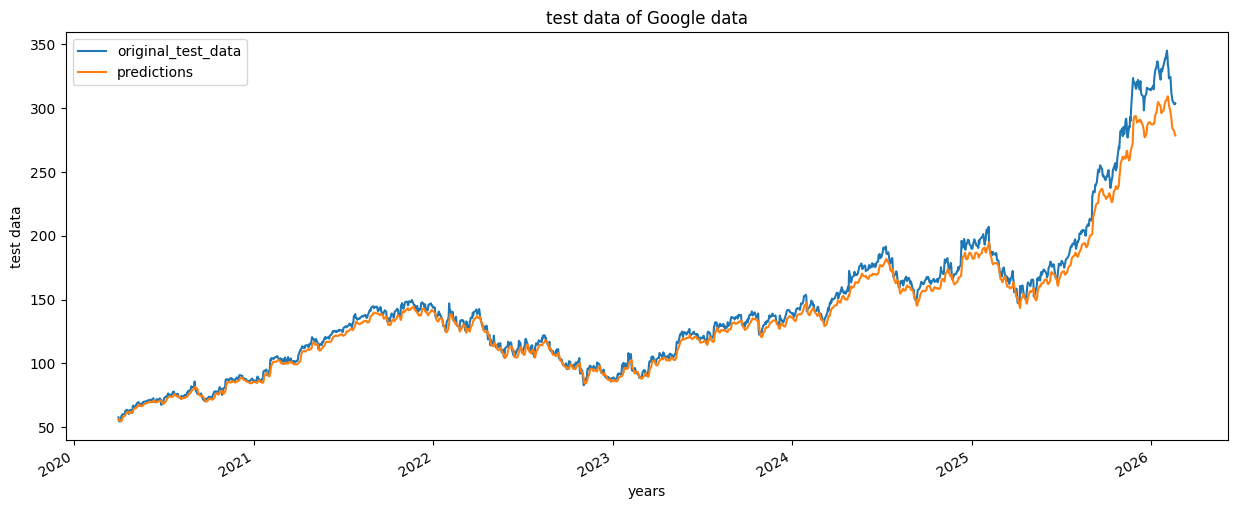

In [51]:
plot_graph((15,6), ploting_data, 'test data')

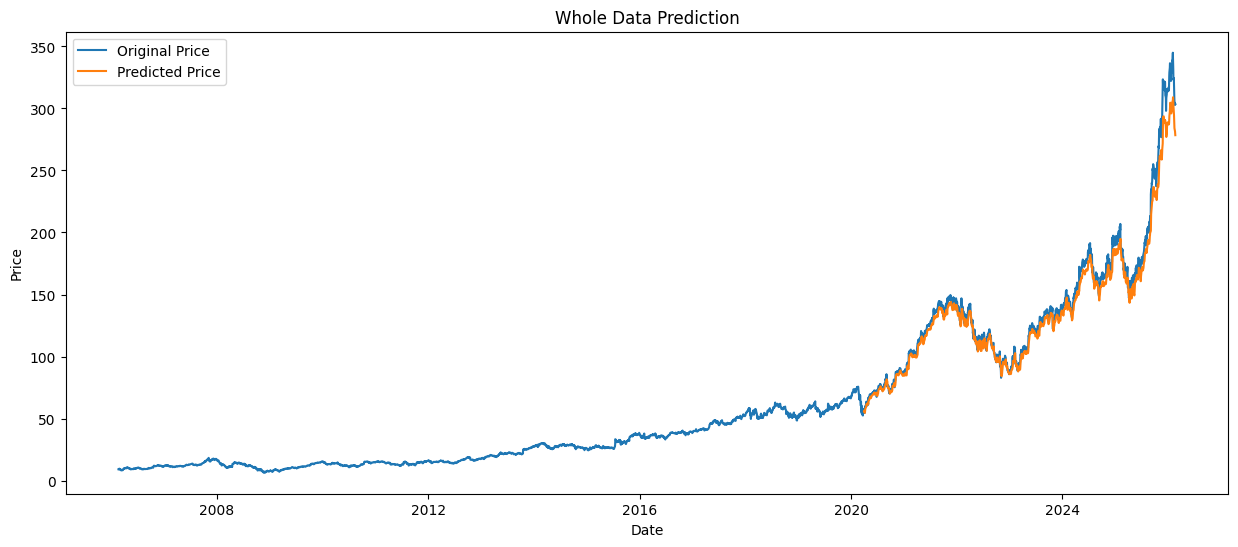

In [52]:
plt.figure(figsize=(15,6))

plt.plot(google_data['Close'], label='Original Price')
plt.plot(ploting_data['predictions'], label='Predicted Price')

plt.legend()
plt.title("Whole Data Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [53]:
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))
print("RMSE:", rmse)


RMSE: 8.88406389717421


In [54]:
model.save("Latest_stock_price_model.keras")


In [55]:
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [56]:
google_data.columns = google_data.columns.get_level_values(0)


In [58]:
!python "C:\Users\KIIT0001\Desktop\mini project\web_stock_price_predictor.py"

2026-02-20 16:57:37.332380: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-20 16:57:44.542375: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-20 16:57:51.453 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-20 16:57:53.827 
  command:

    streamlit run C:\Users\KIIT0001\Desktop\mini project\web_stock_price_predictor.py [ARGUMENTS]
2026-02-20 16:57:53.828 Thread 'MainThread': missing ScriptRunContext! This warning ca